In [4]:
!pip install -U datasets

   ---------------------------------------- 0.0/561.5 kB ? eta -:--:--
   ------------------ --------------------- 262.1/561.5 kB ? eta -:--:--
   ---------------------------------------- 561.5/561.5 kB 1.3 MB/s eta 0:00:00

   -------- ------------------------------- 1/5 [multiprocess]
   -------- ------------------------------- 1/5 [multiprocess]
  Attempting uninstall: fsspec
   -------- ------------------------------- 1/5 [multiprocess]
    Found existing installation: fsspec 2025.3.2
   -------- ------------------------------- 1/5 [multiprocess]
    Uninstalling fsspec-2025.3.2:
   -------- ------------------------------- 1/5 [multiprocess]
      Successfully uninstalled fsspec-2025.3.2
   -------- ------------------------------- 1/5 [multiprocess]
   ---------------- ----------------------- 2/5 [fsspec]
   ---------------- ----------------------- 2/5 [fsspec]
   ---------------- ----------------------- 2/5 [fsspec]
   ------------------------ --------------- 3/5 [huggingface-hub]

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
s3fs 2025.3.2 requires fsspec==2025.3.2.*, but you have fsspec 2025.3.0 which is incompatible.


## Exploratory Data Analysis for DA jobs in US

In [5]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 

In [ ]:
# Loading Data
load_dataset('lukebarousse/data_jobs')

DatasetDict({
    train: Dataset({
        features: ['job_title_short', 'job_title', 'job_location', 'job_via', 'job_schedule_type', 'job_work_from_home', 'search_location', 'job_posted_date', 'job_no_degree_mention', 'job_health_insurance', 'job_country', 'salary_rate', 'salary_year_avg', 'salary_hour_avg', 'company_name', 'job_skills', 'job_type_skills'],
        num_rows: 785741
    })
})

In [6]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()


README.md: 0.00B [00:00, ?B/s]

c:\Users\sachm\anaconda3\Anaconda\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\sachm\.cache\huggingface\hub\datasets--lukebarousse--data_jobs. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


data_jobs.csv:   0%|          | 0.00/231M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

In [9]:
# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### US Data Analyst Roles

In [22]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]

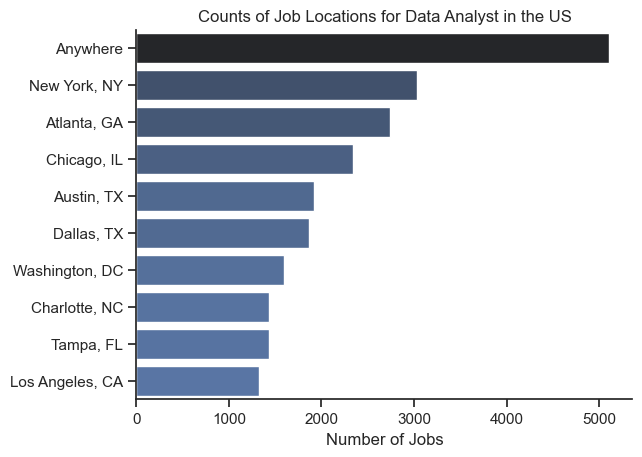

In [23]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Number of Jobs in US

In [25]:
df_jobs= df[(df['job_country'] == 'United States')]

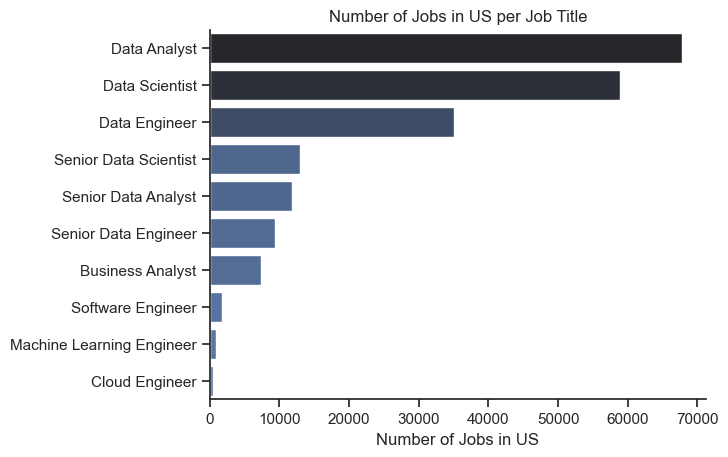

In [28]:
df_plot = df_jobs['job_title_short'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_title_short', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs in US per Job Title')
plt.xlabel('Number of Jobs in US')
plt.ylabel('')
plt.show()

### Number of Jobs in Each Country


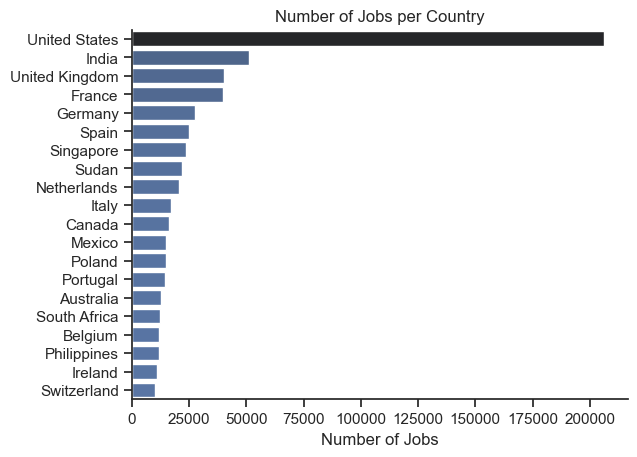

In [11]:
df_plot = df['job_country'].value_counts().to_frame().head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_country', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Top Employers 

In [31]:
df_job_company= df[(df['job_country']=='United States')]

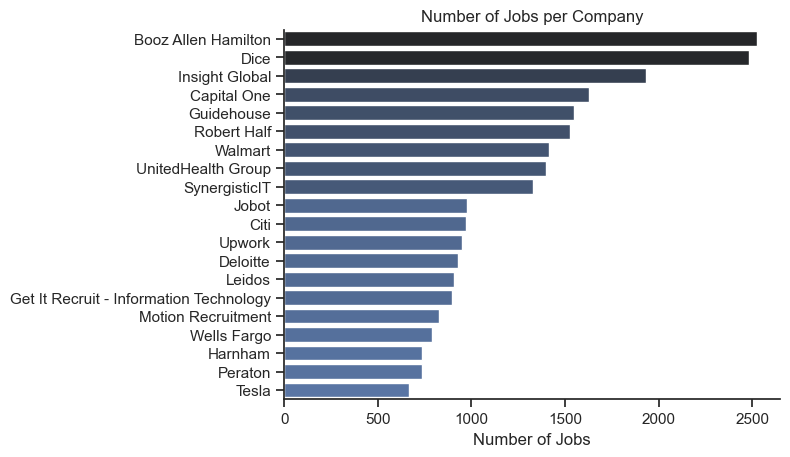

In [ ]:
df_plot = df_job_company['company_name'].value_counts().to_frame().head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Company in US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Job Requirements and Benefits

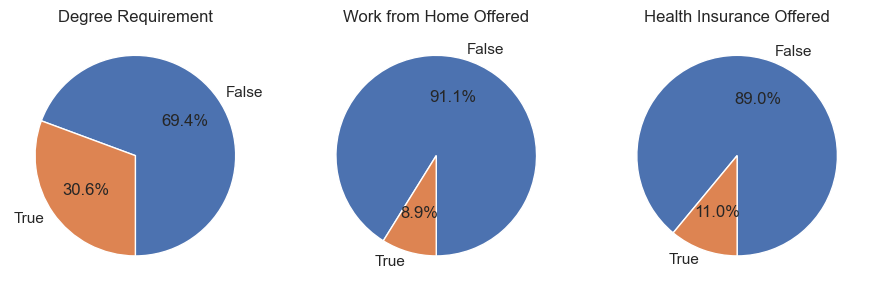

In [21]:
dict_column = {
    'job_no_degree_mention': 'Degree Requirement',
    'job_work_from_home': 'Work from Home Offered',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=270)
    ax[i].set_title(title)

plt.show()